# Temporal regularity analysis

- Temporal regularity across the aggregate, strong, and weak mobility ties

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import copy
from scipy.sparse import csr_matrix
import time


Bad key text.latex.unicode in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')


In [2]:
with open('../../data/05_model_outputs/temporal_performance.pickle', 'rb') as f:
    temporal_performance = pickle.load(f)

In [3]:
# 
fig_location = '../../../economic-strength-of-weak-mobility-ties-paper-/figs/'

In [4]:
temporal_performance['boston']

{'aggregate': {'aggregate': 0.8469959929671144},
 'strong': {'Office': 0.8151544828278091,
  'Residential': 0.8190485463614737,
  'Building': 0.8092602247572745,
  'Automotive': 0.8730102369152167,
  'Church': 0.8451734521023866,
  'Salon / Barbershop': 0.8468901018439676,
  "Doctor's Office": 0.8244271174708256,
  'Pizza': 0.836381801840681,
  'American': 0.726535023441807,
  'Gas Station': 0.8778741341121703,
  'Gym': 0.714349434841586,
  'Road': 0.8441206932984844,
  'Bank': 0.7206128849681136,
  'Donuts': 0.8024916303589245,
  'Hardware': 0.6287500825169141,
  'Grocery Store': 0.617367705571898,
  'Supermarket': 0.5350169353135696,
  'Bar': 0.7692930552543473,
  "Dentist's Office": 0.810874434023246,
  'Convenience Store': 0.8734265063844331},
 'weak': {'Art Museum': 0.4579023298774818,
  'Bagels': 0.46909082443482153,
  'Brazilian': 0.7047601705122248,
  'Car Washes': 0.2833166840059451,
  'Caribbean': 0.7630355213591438,
  'Convenience Store': 0.8734265063844331,
  'Cupcakes': 0.

In [5]:
# combine the data for visualization
temporal_r2_dic = {}
for city in ['boston','chicago','miami']:
    temporal_r2_df = pd.DataFrame({'r2': list(temporal_performance[city]['aggregate'].values()) + list(temporal_performance[city]['strong'].values()) +  list(temporal_performance[city]['weak'].values()),
                                   'tie_cat': ['aggregate'] + ['strong'] * len(temporal_performance[city]['strong'].values()) + ['weak']*len(temporal_performance[city]['weak'].values()),
                                   'city': [city]*(1+len(temporal_performance[city]['strong'].values())+len(temporal_performance[city]['weak'].values()))
                                  })
    temporal_r2_dic[city]=temporal_r2_df
    
# 
temporal_r2 = pd.concat(temporal_r2_dic, axis = 0)
temporal_r2.reset_index(inplace = True, drop = True)
temporal_r2

,r2,tie_cat,city
0,0.846996,aggregate,boston
1,0.815154,strong,boston
2,0.819049,strong,boston
3,0.809260,strong,boston
4,0.873010,strong,boston
...,...,...,...
156,0.344480,weak,miami
157,0.606174,weak,miami
158,0.368631,weak,miami
159,0.316893,weak,miami


#### following numbers are used in writing

In [7]:
np.sum(temporal_r2.tie_cat == 'strong')/3

20.0

In [8]:
# average aggregate
temporal_r2.loc[temporal_r2.tie_cat == 'aggregate']

,r2,tie_cat,city
0,0.846996,aggregate,boston
59,0.880734,aggregate,chicago
107,0.821975,aggregate,miami


In [9]:
# average strong
temporal_r2.loc[temporal_r2.tie_cat == 'strong'].groupby('city').mean()

,r2
city,
boston,0.779503
chicago,0.844417
miami,0.776221


In [10]:
# average weak
temporal_r2.loc[temporal_r2.tie_cat == 'weak'].groupby('city').mean()

,r2
city,
boston,0.456733
chicago,0.459835
miami,0.464719


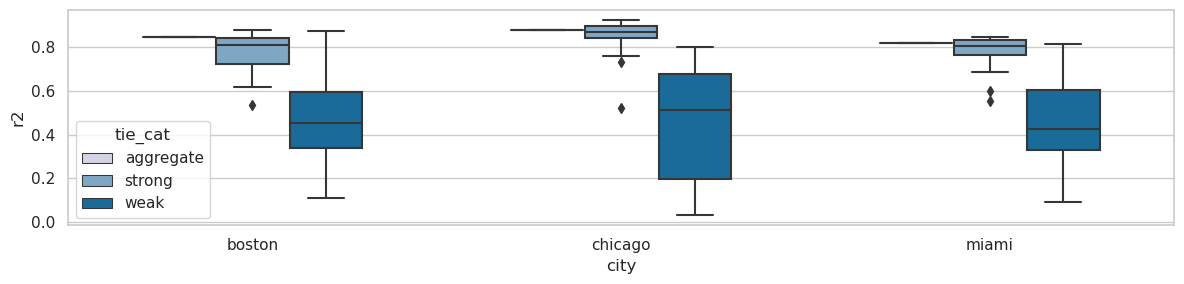

In [11]:
# plot the comparison of temporal regularity.
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize = (12,3))

sns.boxplot(x="city", y="r2", hue="tie_cat", data=temporal_r2, 
            ax = ax, palette='PuBu',
            width = 0.6)
# ax.axhline(1.0, linestyle = '--', color = 'grey')
# ax.annotate("Spatial Baseline = 1.0",
#             xy=(-0.5, 0.5), xycoords = 'data',
#             xytext=(-0.5, 0.5), textcoords = 'data',
#             size = 10)
# ax.legend(title = 'edge categories')

params = {
     'legend.fontsize': 10,
     'axes.labelsize': 10,
     'axes.titlesize': 15,
     'xtick.labelsize': 10,
     'ytick.labelsize': 10}

# ax.set_ylim([0,15])
# ax.set_xlabel("Cities")
# ax.set_ylabel("Edge betweenness centrality")

plt.tight_layout()
plt.show()

# fig.savefig(fig_location+'edge_bet_centrality_cities.png')
